In [4]:
pip install torch torchvision notebook

Note: you may need to restart the kernel to use updated packages.


In [6]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations: convert images to tensors and normalize them
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training and testing datasets
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders to fetch the data in batches
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


In [8]:
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Input layer to hidden layer (28*28 = 784 input features, 128 hidden units)
        self.fc1 = nn.Linear(28*28, 128)
        # Second hidden layer (128 units to 64)
        self.fc2 = nn.Linear(128, 64)
        # Output layer (10 classes for digits 0-9)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Flatten the image from 28x28 to a 784 long vector
        x = x.view(-1, 28*28)
        # Apply ReLU activation after each hidden layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # Output layer (no activation needed here)
        x = self.fc3(x)
        return x

# Initialize the network
model = Net()


In [10]:
import torch.optim as optim

# Define the loss function (cross-entropy) and optimizer (Adam or SGD)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [12]:
# Training loop
epochs = 5
for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        output = model(images)
        loss = criterion(output, labels)
        
        # Backward pass and optimization step
        loss.backward()
        optimizer.step()
        
        # Track the loss
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}") 

Epoch 1, Loss: 0.4038765197957375
Epoch 2, Loss: 0.19581700648580277
Epoch 3, Loss: 0.1476392093062925
Epoch 4, Loss: 0.11798882172274183
Epoch 5, Loss: 0.10268915666322877


In [14]:
correct = 0
total = 0
with torch.no_grad():  # No need to compute gradients for testing
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")

Accuracy: 96.24%


In [14]:
torch.save(model.state_dict(), 'mnist_model.pth')

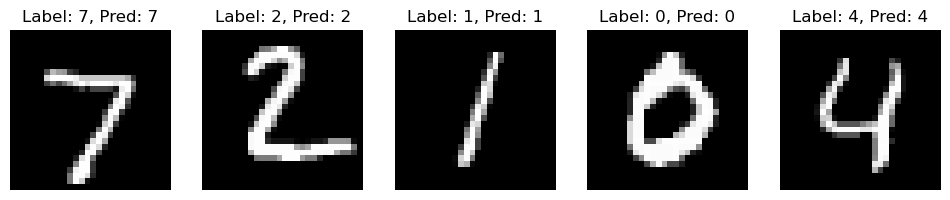

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize a few test images along with their predictions
def visualize_images(images, labels, predictions):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 4))
    for i, (img, label, pred) in enumerate(zip(images, labels, predictions)):
        img = img.view(28, 28).numpy()
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"Label: {label}, Pred: {pred}")
        axes[i].axis('off')

# Get some images from the test set and their predictions
images, labels = next(iter(testloader))
output = model(images)
_, predictions = torch.max(output, 1)

# Visualize the first 5 test images and their predictions
visualize_images(images[:5], labels[:5], predictions[:5])

In [2]:
import os
os.getcwd()

'/Users/apurvpanbude'